# Feature Engineering

### by Raghav Khanna 
---

1. Import packages
2. Load data
3. Feature engineering

---

## 1. Import packages

In [858]:
import pandas as pd
import numpy as np

---
## 2. Load data

In [859]:
eda_data = pd.read_csv('clean_eda_data.csv')

eda_data["date_activ"] = pd.to_datetime(eda_data["date_activ"], format='%Y-%m-%d')
eda_data["date_end"] = pd.to_datetime(eda_data["date_end"], format='%Y-%m-%d')
eda_data["date_modif_prod"] = pd.to_datetime(eda_data["date_modif_prod"], format='%Y-%m-%d')
eda_data["date_renewal"] = pd.to_datetime(eda_data["date_renewal"], format='%Y-%m-%d')

In [860]:
eda_data = eda_data.drop(columns=['Unnamed: 0'])

In [861]:
eda_data.head(3)

,id,channel_sales,cons_12m,cons_gas_12m,cons_last_month,date_activ,date_end,date_modif_prod,date_renewal,forecast_cons_12m,...,mean_year_price_off_peak_var,mean_year_price_peak_var,mean_year_price_mid_peak_var,mean_year_price_off_peak_fix,mean_year_price_peak_fix,mean_year_price_mid_peak_fix,mean_year_price_off_peak,mean_year_price_mid_peak,mean_year_price_peak,churn
0,24011ae4ebbe3035111d65fa7c15bc57,foosdfpfkusacimwkcsosbicdxkicaua,0,54946,0,2013-06-15,2016-06-15,2015-11-01,2015-06-23,0.00,...,0.124787,0.100749,0.06653,40.942265,22.35201,14.90134,41.067053,14.967871,22.452760,1
1,d29c2c54acc38ff3c0614d0a653813dd,MISSING,4660,0,0,2009-08-21,2016-08-30,2009-08-21,2015-08-31,189.95,...,0.149609,0.007124,0.00000,44.311375,0.00000,0.00000,44.460984,0.000000,0.007124,0
2,764c75f661154dac3a6c254cd082ea7d,foosdfpfkusacimwkcsosbicdxkicaua,544,0,0,2010-04-16,2016-04-16,2010-04-16,2015-04-17,47.96,...,0.170512,0.088421,0.00000,44.385450,0.00000,0.00000,44.555962,0.000000,0.088421,0


In [862]:
eda_data.columns

Index(['id', 'channel_sales', 'cons_12m', 'cons_gas_12m', 'cons_last_month',
       'date_activ', 'date_end', 'date_modif_prod', 'date_renewal',
       'forecast_cons_12m', 'forecast_cons_year', 'forecast_discount_energy',
       'forecast_meter_rent_12m', 'forecast_price_energy_off_peak',
       'forecast_price_energy_peak', 'forecast_price_pow_off_peak', 'has_gas',
       'imp_cons', 'margin_gross_pow_ele', 'margin_net_pow_ele', 'nb_prod_act',
       'net_margin', 'num_years_antig', 'origin_up', 'pow_max',
       'mean_3m_price_off_peak_var', 'mean_3m_price_peak_var',
       'mean_3m_price_mid_peak_var', 'mean_3m_price_off_peak_fix',
       'mean_3m_price_peak_fix', 'mean_3m_price_mid_peak_fix',
       'mean_3m_price_off_peak', 'mean_3m_price_mid_peak',
       'mean_3m_price_peak', 'mean_6m_price_off_peak_var',
       'mean_6m_price_peak_var', 'mean_6m_price_mid_peak_var',
       'mean_6m_price_off_peak_fix', 'mean_6m_price_peak_fix',
       'mean_6m_price_mid_peak_fix', 'mean_6m_pri

---

## 3. Feature engineering

### Difference between off-peak prices in December and preceding January

Below is the code created by your colleague to calculate the feature described above. Use this code to re-create this feature and then think about ways to build on this feature to create features with a higher predictive power.

In [863]:
price_df = pd.read_csv('price_data.csv')
price_df["price_date"] = pd.to_datetime(price_df["price_date"], format='%Y-%m-%d')
price_df.head()

,id,price_date,price_off_peak_var,price_peak_var,price_mid_peak_var,price_off_peak_fix,price_peak_fix,price_mid_peak_fix
0,038af19179925da21a25619c5a24b745,2015-01-01,0.151367,0.0,0.0,44.266931,0.0,0.0
1,038af19179925da21a25619c5a24b745,2015-02-01,0.151367,0.0,0.0,44.266931,0.0,0.0
2,038af19179925da21a25619c5a24b745,2015-03-01,0.151367,0.0,0.0,44.266931,0.0,0.0
3,038af19179925da21a25619c5a24b745,2015-04-01,0.149626,0.0,0.0,44.266931,0.0,0.0
4,038af19179925da21a25619c5a24b745,2015-05-01,0.149626,0.0,0.0,44.266931,0.0,0.0


In [864]:
# Group off-peak prices by companies and month
monthly_price_by_id = price_df.groupby(['id', 'price_date']).agg({'price_off_peak_var': 'mean', 'price_off_peak_fix': 'mean'}).reset_index()


In [865]:
# Get january and december prices
jan_prices = monthly_price_by_id.groupby('id').first().reset_index()
dec_prices = monthly_price_by_id.groupby('id').last().reset_index()


In [866]:
# Calculate the difference
diff = pd.merge(dec_prices.rename(columns={'price_off_peak_var': 'dec_1', 'price_off_peak_fix': 'dec_2'}), jan_prices.drop(columns='price_date'), on='id')
diff['offpeak_diff_dec_january_energy'] = diff['dec_1'] - diff['price_off_peak_var']
diff['offpeak_diff_dec_january_power'] = diff['dec_2'] - diff['price_off_peak_fix']
diff = diff[['id', 'offpeak_diff_dec_january_energy','offpeak_diff_dec_january_power']]
diff.head()

,id,offpeak_diff_dec_january_energy,offpeak_diff_dec_january_power
0,0002203ffbb812588b632b9e628cc38d,-0.006192,0.162916
1,0004351ebdd665e6ee664792efc4fd13,-0.004104,0.177779
2,0010bcc39e42b3c2131ed2ce55246e3c,0.050443,1.500000
3,0010ee3855fdea87602a5b7aba8e42de,-0.010018,0.162916
4,00114d74e963e47177db89bc70108537,-0.003994,-0.000001


In [867]:
eda_data = eda_data.merge(diff,on='id')
eda_data.head(3)

,id,channel_sales,cons_12m,cons_gas_12m,cons_last_month,date_activ,date_end,date_modif_prod,date_renewal,forecast_cons_12m,...,mean_year_price_mid_peak_var,mean_year_price_off_peak_fix,mean_year_price_peak_fix,mean_year_price_mid_peak_fix,mean_year_price_off_peak,mean_year_price_mid_peak,mean_year_price_peak,churn,offpeak_diff_dec_january_energy,offpeak_diff_dec_january_power
0,24011ae4ebbe3035111d65fa7c15bc57,foosdfpfkusacimwkcsosbicdxkicaua,0,54946,0,2013-06-15,2016-06-15,2015-11-01,2015-06-23,0.00,...,0.06653,40.942265,22.35201,14.90134,41.067053,14.967871,22.452760,1,0.020057,3.700961
1,d29c2c54acc38ff3c0614d0a653813dd,MISSING,4660,0,0,2009-08-21,2016-08-30,2009-08-21,2015-08-31,189.95,...,0.00000,44.311375,0.00000,0.00000,44.460984,0.000000,0.007124,0,-0.003767,0.177779
2,764c75f661154dac3a6c254cd082ea7d,foosdfpfkusacimwkcsosbicdxkicaua,544,0,0,2010-04-16,2016-04-16,2010-04-16,2015-04-17,47.96,...,0.00000,44.385450,0.00000,0.00000,44.555962,0.000000,0.088421,0,-0.004670,0.177779


Average change in prices

In [868]:
lst = list(price_df.columns)
lst = lst[2:]
agg_dict = {key:'mean' for key in lst} 
agg_dict

{'price_off_peak_var': 'mean',
 'price_peak_var': 'mean',
 'price_mid_peak_var': 'mean',
 'price_off_peak_fix': 'mean',
 'price_peak_fix': 'mean',
 'price_mid_peak_fix': 'mean'}

In [869]:
mean_prices = price_df.groupby(['id']).agg(agg_dict).reset_index()
mean_prices.head(3)

,id,price_off_peak_var,price_peak_var,price_mid_peak_var,price_off_peak_fix,price_peak_fix,price_mid_peak_fix
0,0002203ffbb812588b632b9e628cc38d,0.124338,0.103794,0.07316,40.701732,24.421038,16.280694
1,0004351ebdd665e6ee664792efc4fd13,0.146426,0.000000,0.00000,44.385450,0.000000,0.000000
2,0010bcc39e42b3c2131ed2ce55246e3c,0.181558,0.000000,0.00000,45.319710,0.000000,0.000000


In [870]:
mean_prices['off_peak_peak_var_mean_diff'] = mean_prices['price_off_peak_var'] - mean_prices['price_peak_var']
mean_prices['off_peak_mid_peak_var_mean_diff'] = mean_prices['price_off_peak_var'] - mean_prices['price_mid_peak_var']
mean_prices['peak_mid_peak_var_mean_diff'] = mean_prices['price_peak_var'] - mean_prices['price_mid_peak_var']
mean_prices['off_peak_peak_fix_mean_diff'] = mean_prices['price_off_peak_fix'] - mean_prices['price_peak_fix']
mean_prices['off_peak_mid_peak_fix_mean_diff'] = mean_prices['price_off_peak_fix'] - mean_prices['price_mid_peak_fix']
mean_prices['peak_mid_peak_fix_mean_diff'] = mean_prices['price_peak_fix'] - mean_prices['price_mid_peak_fix']

In [871]:
cols = []
cols.append(mean_prices.columns[0])
cols = cols + list(mean_prices.columns[7:])

eda_data = pd.merge(eda_data, mean_prices[cols], on ='id')
eda_data.head(3)

,id,channel_sales,cons_12m,cons_gas_12m,cons_last_month,date_activ,date_end,date_modif_prod,date_renewal,forecast_cons_12m,...,mean_year_price_peak,churn,offpeak_diff_dec_january_energy,offpeak_diff_dec_january_power,off_peak_peak_var_mean_diff,off_peak_mid_peak_var_mean_diff,peak_mid_peak_var_mean_diff,off_peak_peak_fix_mean_diff,off_peak_mid_peak_fix_mean_diff,peak_mid_peak_fix_mean_diff
0,24011ae4ebbe3035111d65fa7c15bc57,foosdfpfkusacimwkcsosbicdxkicaua,0,54946,0,2013-06-15,2016-06-15,2015-11-01,2015-06-23,0.00,...,22.452760,1,0.020057,3.700961,0.024038,0.058257,0.034219,18.590255,26.040925,7.45067
1,d29c2c54acc38ff3c0614d0a653813dd,MISSING,4660,0,0,2009-08-21,2016-08-30,2009-08-21,2015-08-31,189.95,...,0.007124,0,-0.003767,0.177779,0.142485,0.149609,0.007124,44.311375,44.311375,0.00000
2,764c75f661154dac3a6c254cd082ea7d,foosdfpfkusacimwkcsosbicdxkicaua,544,0,0,2010-04-16,2016-04-16,2010-04-16,2015-04-17,47.96,...,0.088421,0,-0.004670,0.177779,0.082090,0.170512,0.088421,44.385450,44.385450,0.00000


Now, we have the features that look at average price disparity rather than the difference across the year in prices(oof_peak, peak, mid_peak) revealing micro-scale patterns between months. Whereas, the Dec-Jan off-peak difference may reveal macro scale features.

### Max price change across periods and months

In [872]:
mean_price_by_month = price_df.groupby(['id','price_date']).agg(agg_dict).reset_index()
mean_price_by_month.head(5)

,id,price_date,price_off_peak_var,price_peak_var,price_mid_peak_var,price_off_peak_fix,price_peak_fix,price_mid_peak_fix
0,0002203ffbb812588b632b9e628cc38d,2015-01-01,0.126098,0.103975,0.070232,40.565969,24.339581,16.226389
1,0002203ffbb812588b632b9e628cc38d,2015-02-01,0.126098,0.103975,0.070232,40.565969,24.339581,16.226389
2,0002203ffbb812588b632b9e628cc38d,2015-03-01,0.128067,0.105842,0.073773,40.728885,24.437330,16.291555
3,0002203ffbb812588b632b9e628cc38d,2015-04-01,0.128067,0.105842,0.073773,40.728885,24.437330,16.291555
4,0002203ffbb812588b632b9e628cc38d,2015-05-01,0.128067,0.105842,0.073773,40.728885,24.437330,16.291555


In [873]:
mean_price_by_month['off_peak_peak_var_mean_diff'] = mean_price_by_month['price_off_peak_var'] - mean_price_by_month['price_peak_var']
mean_price_by_month['off_peak_mid_peak_var_mean_diff'] = mean_price_by_month['price_off_peak_var'] - mean_price_by_month['price_mid_peak_var']
mean_price_by_month['peak_mid_peak_var_mean_diff'] = mean_price_by_month['price_peak_var'] - mean_price_by_month['price_mid_peak_var']
mean_price_by_month['off_peak_peak_fix_mean_diff'] = mean_price_by_month['price_off_peak_fix'] - mean_price_by_month['price_peak_fix']
mean_price_by_month['off_peak_mid_peak_fix_mean_diff'] = mean_price_by_month['price_off_peak_fix'] - mean_price_by_month['price_mid_peak_fix']
mean_price_by_month['peak_mid_peak_fix_mean_diff'] = mean_price_by_month['price_peak_fix'] - mean_price_by_month['price_mid_peak_fix']

In [874]:
lst = list(mean_price_by_month.columns)
lst = lst[8:]
agg_dict_month = {key:'max' for key in lst} 
agg_dict_month

{'off_peak_peak_var_mean_diff': 'max',
 'off_peak_mid_peak_var_mean_diff': 'max',
 'peak_mid_peak_var_mean_diff': 'max',
 'off_peak_peak_fix_mean_diff': 'max',
 'off_peak_mid_peak_fix_mean_diff': 'max',
 'peak_mid_peak_fix_mean_diff': 'max'}

In [875]:
lst_max= lst
substring_to_replace = "mean"
replacement_substring = "max_monthly"

updated_list = [string.replace(substring_to_replace, replacement_substring) for string in lst_max]

print(updated_list)


['off_peak_peak_var_max_monthly_diff', 'off_peak_mid_peak_var_max_monthly_diff', 'peak_mid_peak_var_max_monthly_diff', 'off_peak_peak_fix_max_monthly_diff', 'off_peak_mid_peak_fix_max_monthly_diff', 'peak_mid_peak_fix_max_monthly_diff']


In [876]:
rename_cols = {key:value for key,value in zip(lst,updated_list)}
rename_cols

{'off_peak_peak_var_mean_diff': 'off_peak_peak_var_max_monthly_diff',
 'off_peak_mid_peak_var_mean_diff': 'off_peak_mid_peak_var_max_monthly_diff',
 'peak_mid_peak_var_mean_diff': 'peak_mid_peak_var_max_monthly_diff',
 'off_peak_peak_fix_mean_diff': 'off_peak_peak_fix_max_monthly_diff',
 'off_peak_mid_peak_fix_mean_diff': 'off_peak_mid_peak_fix_max_monthly_diff',
 'peak_mid_peak_fix_mean_diff': 'peak_mid_peak_fix_max_monthly_diff'}

In [877]:
max_diff_across_periods_month = mean_price_by_month.groupby('id').agg(agg_dict_month).reset_index().rename(columns=rename_cols)
max_diff_across_periods_month.head(5)


,id,off_peak_peak_var_max_monthly_diff,off_peak_mid_peak_var_max_monthly_diff,peak_mid_peak_var_max_monthly_diff,off_peak_peak_fix_max_monthly_diff,off_peak_mid_peak_fix_max_monthly_diff,peak_mid_peak_fix_max_monthly_diff
0,0002203ffbb812588b632b9e628cc38d,0.022225,0.055866,0.033743,16.291555,24.437330,8.145775
1,0004351ebdd665e6ee664792efc4fd13,0.148405,0.148405,0.000000,44.444710,44.444710,0.000000
2,0010bcc39e42b3c2131ed2ce55246e3c,0.205742,0.205742,0.000000,45.944710,45.944710,0.000000
3,0010ee3855fdea87602a5b7aba8e42de,0.022581,0.054440,0.031859,16.291555,24.437330,8.145775
4,00114d74e963e47177db89bc70108537,0.149902,0.149902,0.000000,44.266931,44.266931,0.000000


In [878]:
eda_data = eda_data.merge(max_diff_across_periods_month,on='id')
eda_data.head(5)

,id,channel_sales,cons_12m,cons_gas_12m,cons_last_month,date_activ,date_end,date_modif_prod,date_renewal,forecast_cons_12m,...,peak_mid_peak_var_mean_diff,off_peak_peak_fix_mean_diff,off_peak_mid_peak_fix_mean_diff,peak_mid_peak_fix_mean_diff,off_peak_peak_var_max_monthly_diff,off_peak_mid_peak_var_max_monthly_diff,peak_mid_peak_var_max_monthly_diff,off_peak_peak_fix_max_monthly_diff,off_peak_mid_peak_fix_max_monthly_diff,peak_mid_peak_fix_max_monthly_diff
0,24011ae4ebbe3035111d65fa7c15bc57,foosdfpfkusacimwkcsosbicdxkicaua,0,54946,0,2013-06-15,2016-06-15,2015-11-01,2015-06-23,0.00,...,0.034219,18.590255,26.040925,7.450670,0.060550,0.146033,0.085483,44.266930,44.26693,8.145775
1,d29c2c54acc38ff3c0614d0a653813dd,MISSING,4660,0,0,2009-08-21,2016-08-30,2009-08-21,2015-08-31,189.95,...,0.007124,44.311375,44.311375,0.000000,0.151367,0.151367,0.085483,44.444710,44.44471,0.000000
2,764c75f661154dac3a6c254cd082ea7d,foosdfpfkusacimwkcsosbicdxkicaua,544,0,0,2010-04-16,2016-04-16,2010-04-16,2015-04-17,47.96,...,0.088421,44.385450,44.385450,0.000000,0.084587,0.172468,0.089162,44.444710,44.44471,0.000000
3,bba03439a292a1e166f80264c16191cb,lmkebamcaaclubfxadlmueccxoimlema,1584,0,0,2010-03-30,2016-03-30,2010-03-30,2015-03-31,240.04,...,0.000000,44.400265,44.400265,0.000000,0.153133,0.153133,0.000000,44.444710,44.44471,0.000000
4,149d57cf92fc41cf94415803a877cb4b,MISSING,4425,0,526,2010-01-13,2016-03-07,2010-01-13,2015-03-09,445.75,...,0.030773,16.275263,24.412893,8.137629,0.022225,0.055866,0.033743,16.291555,24.43733,8.145775


 In an effort to consider the viewpoint of a PowerCo client, I believed that calculating the maximum price change across months and time periods would be a useful feature to develop. Nothing irritates me more as a utility customer than unexpected price changes between months, and a significant price increase within a short period of time would prompt me to shop around for a better deal with other utilities providers. For this use case, we are attempting to predict churn, thus I thought it would be interesting to integrate this feature

### Calculating Tenure(Decrypting Date Variables)

In [879]:
eda_data['Tenure (Years)'] = (eda_data['date_end']-eda_data['date_activ'])//np.timedelta64(1,'Y')
eda_data.head(3)

,id,channel_sales,cons_12m,cons_gas_12m,cons_last_month,date_activ,date_end,date_modif_prod,date_renewal,forecast_cons_12m,...,off_peak_peak_fix_mean_diff,off_peak_mid_peak_fix_mean_diff,peak_mid_peak_fix_mean_diff,off_peak_peak_var_max_monthly_diff,off_peak_mid_peak_var_max_monthly_diff,peak_mid_peak_var_max_monthly_diff,off_peak_peak_fix_max_monthly_diff,off_peak_mid_peak_fix_max_monthly_diff,peak_mid_peak_fix_max_monthly_diff,Tenure (Years)
0,24011ae4ebbe3035111d65fa7c15bc57,foosdfpfkusacimwkcsosbicdxkicaua,0,54946,0,2013-06-15,2016-06-15,2015-11-01,2015-06-23,0.00,...,18.590255,26.040925,7.45067,0.060550,0.146033,0.085483,44.26693,44.26693,8.145775,3
1,d29c2c54acc38ff3c0614d0a653813dd,MISSING,4660,0,0,2009-08-21,2016-08-30,2009-08-21,2015-08-31,189.95,...,44.311375,44.311375,0.00000,0.151367,0.151367,0.085483,44.44471,44.44471,0.000000,7
2,764c75f661154dac3a6c254cd082ea7d,foosdfpfkusacimwkcsosbicdxkicaua,544,0,0,2010-04-16,2016-04-16,2010-04-16,2015-04-17,47.96,...,44.385450,44.385450,0.00000,0.084587,0.172468,0.089162,44.44471,44.44471,0.000000,6


Let's convert other dates as well. Assuming reference dates as '2016-01-01' we will find the no. of months for each type of dates left.

In [880]:
def convert_months(column):
    reference_date = pd.to_datetime('2016-01-01',format='%Y-%m-%d')
    time_delta = reference_date - eda_data[column]
    months = ((time_delta)/np.timedelta64(1,'M')).astype(int)
    return months

In [881]:
dates = list(eda_data.columns[5:9])
dates

['date_activ', 'date_end', 'date_modif_prod', 'date_renewal']

In [882]:
months = [string.replace('date','months') for string in dates]
months

['months_activ', 'months_end', 'months_modif_prod', 'months_renewal']

In [883]:
for date,month in zip(dates,months):
    if date == 'date_end':
        eda_data[month] = -convert_months(date)
    else:
        eda_data[month] = convert_months(date)
eda_data.head()

,id,channel_sales,cons_12m,cons_gas_12m,cons_last_month,date_activ,date_end,date_modif_prod,date_renewal,forecast_cons_12m,...,off_peak_mid_peak_var_max_monthly_diff,peak_mid_peak_var_max_monthly_diff,off_peak_peak_fix_max_monthly_diff,off_peak_mid_peak_fix_max_monthly_diff,peak_mid_peak_fix_max_monthly_diff,Tenure (Years),months_activ,months_end,months_modif_prod,months_renewal
0,24011ae4ebbe3035111d65fa7c15bc57,foosdfpfkusacimwkcsosbicdxkicaua,0,54946,0,2013-06-15,2016-06-15,2015-11-01,2015-06-23,0.00,...,0.146033,0.085483,44.266930,44.26693,8.145775,3,30,5,2,6
1,d29c2c54acc38ff3c0614d0a653813dd,MISSING,4660,0,0,2009-08-21,2016-08-30,2009-08-21,2015-08-31,189.95,...,0.151367,0.085483,44.444710,44.44471,0.000000,7,76,7,76,4
2,764c75f661154dac3a6c254cd082ea7d,foosdfpfkusacimwkcsosbicdxkicaua,544,0,0,2010-04-16,2016-04-16,2010-04-16,2015-04-17,47.96,...,0.172468,0.089162,44.444710,44.44471,0.000000,6,68,3,68,8
3,bba03439a292a1e166f80264c16191cb,lmkebamcaaclubfxadlmueccxoimlema,1584,0,0,2010-03-30,2016-03-30,2010-03-30,2015-03-31,240.04,...,0.153133,0.000000,44.444710,44.44471,0.000000,6,69,2,69,9
4,149d57cf92fc41cf94415803a877cb4b,MISSING,4425,0,526,2010-01-13,2016-03-07,2010-01-13,2015-03-09,445.75,...,0.055866,0.033743,16.291555,24.43733,8.145775,6,71,2,71,9


In [884]:
# remove dates as they no longer have any significance
eda_data = eda_data.drop(columns=list(eda_data.columns[5:9]))
eda_data.head()

,id,channel_sales,cons_12m,cons_gas_12m,cons_last_month,forecast_cons_12m,forecast_cons_year,forecast_discount_energy,forecast_meter_rent_12m,forecast_price_energy_off_peak,...,off_peak_mid_peak_var_max_monthly_diff,peak_mid_peak_var_max_monthly_diff,off_peak_peak_fix_max_monthly_diff,off_peak_mid_peak_fix_max_monthly_diff,peak_mid_peak_fix_max_monthly_diff,Tenure (Years),months_activ,months_end,months_modif_prod,months_renewal
0,24011ae4ebbe3035111d65fa7c15bc57,foosdfpfkusacimwkcsosbicdxkicaua,0,54946,0,0.00,0,0.0,1.78,0.114481,...,0.146033,0.085483,44.266930,44.26693,8.145775,3,30,5,2,6
1,d29c2c54acc38ff3c0614d0a653813dd,MISSING,4660,0,0,189.95,0,0.0,16.27,0.145711,...,0.151367,0.085483,44.444710,44.44471,0.000000,7,76,7,76,4
2,764c75f661154dac3a6c254cd082ea7d,foosdfpfkusacimwkcsosbicdxkicaua,544,0,0,47.96,0,0.0,38.72,0.165794,...,0.172468,0.089162,44.444710,44.44471,0.000000,6,68,3,68,8
3,bba03439a292a1e166f80264c16191cb,lmkebamcaaclubfxadlmueccxoimlema,1584,0,0,240.04,0,0.0,19.83,0.146694,...,0.153133,0.000000,44.444710,44.44471,0.000000,6,69,2,69,9
4,149d57cf92fc41cf94415803a877cb4b,MISSING,4425,0,526,445.75,526,0.0,131.73,0.116900,...,0.055866,0.033743,16.291555,24.43733,8.145775,6,71,2,71,9


### Encoding Categorical data

Channel Sales

In [885]:
eda_data['channel_sales'].value_counts()

foosdfpfkusacimwkcsosbicdxkicaua    6753
MISSING                             3725
lmkebamcaaclubfxadlmueccxoimlema    1843
usilxuppasemubllopkaafesmlibmsdf    1375
ewpakwlliwisiwduibdlfmalxowmwpci     893
sddiedcslfslkckwlfkdpoeeailfpeds      11
epumfxlbckeskwekxbiuasklxalciiuu       3
fixdbufsefwooaasfcxdxadsiekoceaa       2
Name: channel_sales, dtype: int64

In [886]:
eda_data = pd.get_dummies(eda_data,columns=['channel_sales'],prefix='channel')
eda_data.head(5)

,id,cons_12m,cons_gas_12m,cons_last_month,forecast_cons_12m,forecast_cons_year,forecast_discount_energy,forecast_meter_rent_12m,forecast_price_energy_off_peak,forecast_price_energy_peak,...,months_modif_prod,months_renewal,channel_MISSING,channel_epumfxlbckeskwekxbiuasklxalciiuu,channel_ewpakwlliwisiwduibdlfmalxowmwpci,channel_fixdbufsefwooaasfcxdxadsiekoceaa,channel_foosdfpfkusacimwkcsosbicdxkicaua,channel_lmkebamcaaclubfxadlmueccxoimlema,channel_sddiedcslfslkckwlfkdpoeeailfpeds,channel_usilxuppasemubllopkaafesmlibmsdf
0,24011ae4ebbe3035111d65fa7c15bc57,0,54946,0,0.00,0,0.0,1.78,0.114481,0.098142,...,2,6,0,0,0,0,1,0,0,0
1,d29c2c54acc38ff3c0614d0a653813dd,4660,0,0,189.95,0,0.0,16.27,0.145711,0.000000,...,76,4,1,0,0,0,0,0,0,0
2,764c75f661154dac3a6c254cd082ea7d,544,0,0,47.96,0,0.0,38.72,0.165794,0.087899,...,68,8,0,0,0,0,1,0,0,0
3,bba03439a292a1e166f80264c16191cb,1584,0,0,240.04,0,0.0,19.83,0.146694,0.000000,...,69,9,0,0,0,0,0,1,0,0
4,149d57cf92fc41cf94415803a877cb4b,4425,0,526,445.75,526,0.0,131.73,0.116900,0.100015,...,71,9,1,0,0,0,0,0,0,0


In [887]:
channel_cols_rem = ['sddiedcslfslkckwlfkdpoeeailfpeds','epumfxlbckeskwekxbiuasklxalciiuu','fixdbufsefwooaasfcxdxadsiekoceaa']
prefix_add = lambda channel: ['channel_' + channel for channel in channel_cols_rem]
channel_cols_rem = prefix_add(channel_cols_rem)

In [888]:
channel_cols_rem

['channel_sddiedcslfslkckwlfkdpoeeailfpeds',
 'channel_epumfxlbckeskwekxbiuasklxalciiuu',
 'channel_fixdbufsefwooaasfcxdxadsiekoceaa']

In [889]:
# dropping columns due to low value count, less important features.
eda_data = eda_data.drop(columns=channel_cols_rem)
eda_data.head(3)


,id,cons_12m,cons_gas_12m,cons_last_month,forecast_cons_12m,forecast_cons_year,forecast_discount_energy,forecast_meter_rent_12m,forecast_price_energy_off_peak,forecast_price_energy_peak,...,Tenure (Years),months_activ,months_end,months_modif_prod,months_renewal,channel_MISSING,channel_ewpakwlliwisiwduibdlfmalxowmwpci,channel_foosdfpfkusacimwkcsosbicdxkicaua,channel_lmkebamcaaclubfxadlmueccxoimlema,channel_usilxuppasemubllopkaafesmlibmsdf
0,24011ae4ebbe3035111d65fa7c15bc57,0,54946,0,0.00,0,0.0,1.78,0.114481,0.098142,...,3,30,5,2,6,0,0,1,0,0
1,d29c2c54acc38ff3c0614d0a653813dd,4660,0,0,189.95,0,0.0,16.27,0.145711,0.000000,...,7,76,7,76,4,1,0,0,0,0
2,764c75f661154dac3a6c254cd082ea7d,544,0,0,47.96,0,0.0,38.72,0.165794,0.087899,...,6,68,3,68,8,0,0,1,0,0


encoding origin_up

In [890]:
eda_data['origin_up'].value_counts()

lxidpiddsbxsbosboudacockeimpuepw    7096
kamkkxfxxuwbdslkwifmmcsiusiuosws    4294
ldkssxwpmemidmecebumciepifcamkci    3148
MISSING                               64
usapbepcfoloekilkwsdiboslwaxobdp       2
ewxeelcelemmiwuafmddpobolfuxioce       1
Name: origin_up, dtype: int64

In [891]:
eda_data = pd.get_dummies(eda_data,columns=['origin_up'],prefix='origin')
eda_data.head()

,id,cons_12m,cons_gas_12m,cons_last_month,forecast_cons_12m,forecast_cons_year,forecast_discount_energy,forecast_meter_rent_12m,forecast_price_energy_off_peak,forecast_price_energy_peak,...,channel_ewpakwlliwisiwduibdlfmalxowmwpci,channel_foosdfpfkusacimwkcsosbicdxkicaua,channel_lmkebamcaaclubfxadlmueccxoimlema,channel_usilxuppasemubllopkaafesmlibmsdf,origin_MISSING,origin_ewxeelcelemmiwuafmddpobolfuxioce,origin_kamkkxfxxuwbdslkwifmmcsiusiuosws,origin_ldkssxwpmemidmecebumciepifcamkci,origin_lxidpiddsbxsbosboudacockeimpuepw,origin_usapbepcfoloekilkwsdiboslwaxobdp
0,24011ae4ebbe3035111d65fa7c15bc57,0,54946,0,0.00,0,0.0,1.78,0.114481,0.098142,...,0,1,0,0,0,0,0,0,1,0
1,d29c2c54acc38ff3c0614d0a653813dd,4660,0,0,189.95,0,0.0,16.27,0.145711,0.000000,...,0,0,0,0,0,0,1,0,0,0
2,764c75f661154dac3a6c254cd082ea7d,544,0,0,47.96,0,0.0,38.72,0.165794,0.087899,...,0,1,0,0,0,0,1,0,0,0
3,bba03439a292a1e166f80264c16191cb,1584,0,0,240.04,0,0.0,19.83,0.146694,0.000000,...,0,0,1,0,0,0,1,0,0,0
4,149d57cf92fc41cf94415803a877cb4b,4425,0,526,445.75,526,0.0,131.73,0.116900,0.100015,...,0,0,0,0,0,0,1,0,0,0


In [892]:
origin_rem = ['MISSING','usapbepcfoloekilkwsdiboslwaxobdp','ewxeelcelemmiwuafmddpobolfuxioce']
prefix_add = lambda origin: ['origin_' + origin for origin in origin_rem]
origin_rem = prefix_add(origin_rem)

In [893]:
origin_rem

['origin_MISSING',
 'origin_usapbepcfoloekilkwsdiboslwaxobdp',
 'origin_ewxeelcelemmiwuafmddpobolfuxioce']

In [894]:
eda_data = eda_data.drop(columns=origin_rem)
eda_data.head()

,id,cons_12m,cons_gas_12m,cons_last_month,forecast_cons_12m,forecast_cons_year,forecast_discount_energy,forecast_meter_rent_12m,forecast_price_energy_off_peak,forecast_price_energy_peak,...,months_modif_prod,months_renewal,channel_MISSING,channel_ewpakwlliwisiwduibdlfmalxowmwpci,channel_foosdfpfkusacimwkcsosbicdxkicaua,channel_lmkebamcaaclubfxadlmueccxoimlema,channel_usilxuppasemubllopkaafesmlibmsdf,origin_kamkkxfxxuwbdslkwifmmcsiusiuosws,origin_ldkssxwpmemidmecebumciepifcamkci,origin_lxidpiddsbxsbosboudacockeimpuepw
0,24011ae4ebbe3035111d65fa7c15bc57,0,54946,0,0.00,0,0.0,1.78,0.114481,0.098142,...,2,6,0,0,1,0,0,0,0,1
1,d29c2c54acc38ff3c0614d0a653813dd,4660,0,0,189.95,0,0.0,16.27,0.145711,0.000000,...,76,4,1,0,0,0,0,1,0,0
2,764c75f661154dac3a6c254cd082ea7d,544,0,0,47.96,0,0.0,38.72,0.165794,0.087899,...,68,8,0,0,1,0,0,1,0,0
3,bba03439a292a1e166f80264c16191cb,1584,0,0,240.04,0,0.0,19.83,0.146694,0.000000,...,69,9,0,0,0,1,0,1,0,0
4,149d57cf92fc41cf94415803a877cb4b,4425,0,526,445.75,526,0.0,131.73,0.116900,0.100015,...,71,9,1,0,0,0,0,1,0,0


### Transforming numerical data or Feature Scaling to remove Skewness

In [895]:
skewed_cols = list(eda_data.columns[1:11])
skewed_cols.append('imp_cons')
skewed_cols

['cons_12m',
 'cons_gas_12m',
 'cons_last_month',
 'forecast_cons_12m',
 'forecast_cons_year',
 'forecast_discount_energy',
 'forecast_meter_rent_12m',
 'forecast_price_energy_off_peak',
 'forecast_price_energy_peak',
 'forecast_price_pow_off_peak',
 'imp_cons']

In [896]:
skewed = eda_data[skewed_cols]
s_df = skewed.describe()

In [897]:
# selecting features for transformation (std > 10)
sel_skewed = []
for col in list(s_df.columns):
    if s_df.iloc[2][col] > 10:
        sel_skewed.append(col)
sel_skewed

['cons_12m',
 'cons_gas_12m',
 'cons_last_month',
 'forecast_cons_12m',
 'forecast_cons_year',
 'forecast_meter_rent_12m',
 'imp_cons']

### Apply Logarithmic transformation

In [898]:

for col in sel_skewed:
    eda_data[col] = np.log10(eda_data[col] + 1)

C:\Users\ragha\AppData\Local\Temp\ipykernel_9064\4239974505.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot((eda_data["cons_12m"].dropna()), ax=axs[0], color='g')
C:\Users\ragha\AppData\Local\Temp\ipykernel_9064\4239974505.py:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot((eda_data[eda_dat

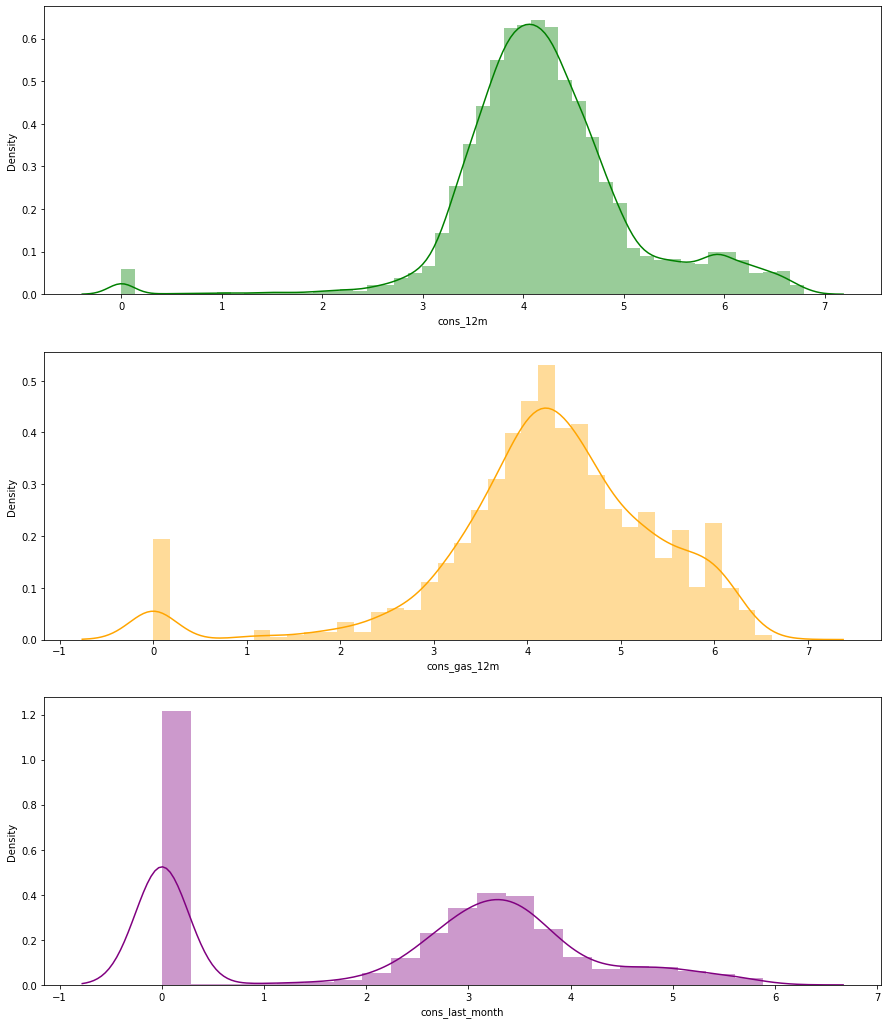

In [899]:
import seaborn as sns
import matplotlib.pyplot as plt

fig, axs = plt.subplots(nrows=3, figsize=(15, 18))
# Plot histograms
sns.distplot((eda_data["cons_12m"].dropna()), ax=axs[0], color='g')
sns.distplot((eda_data[eda_data["has_gas"]==1]["cons_gas_12m"].dropna()), ax=axs[1], color='orange')
sns.distplot((eda_data["cons_last_month"].dropna()), ax=axs[2], color='purple')

plt.show()

In [900]:
skewed = eda_data[skewed_cols]
skewed.describe()

,cons_12m,cons_gas_12m,cons_last_month,forecast_cons_12m,forecast_cons_year,forecast_discount_energy,forecast_meter_rent_12m,forecast_price_energy_off_peak,forecast_price_energy_peak,forecast_price_pow_off_peak,imp_cons
count,14605.000000,14605.000000,14605.000000,14605.000000,14605.000000,14605.000000,14605.000000,14605.000000,14605.000000,14605.000000,14605.000000
mean,4.223945,0.778978,2.264801,2.962162,1.784733,0.966450,1.517233,0.137282,0.050488,43.130085,1.240835
std,0.884545,1.716828,1.769266,0.683612,1.584972,5.108355,0.571489,0.024623,0.049037,4.486140,1.138314
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.753966,0.000000,0.000000,2.695464,0.000000,0.000000,1.235023,0.116340,0.000000,40.606701,0.000000
50%,4.149742,0.000000,2.899821,3.046733,2.498311,0.000000,1.296665,0.143166,0.084138,44.311378,1.584331
75%,4.610287,0.000000,3.529430,3.380803,3.242293,0.000000,2.120673,0.146348,0.098837,44.311378,2.290012
max,6.792889,6.618528,5.887169,4.918575,5.243970,30.000000,2.778376,0.273963,0.195975,59.266378,4.177357


### Checking Correlation

In [901]:
corr = eda_data.corr()

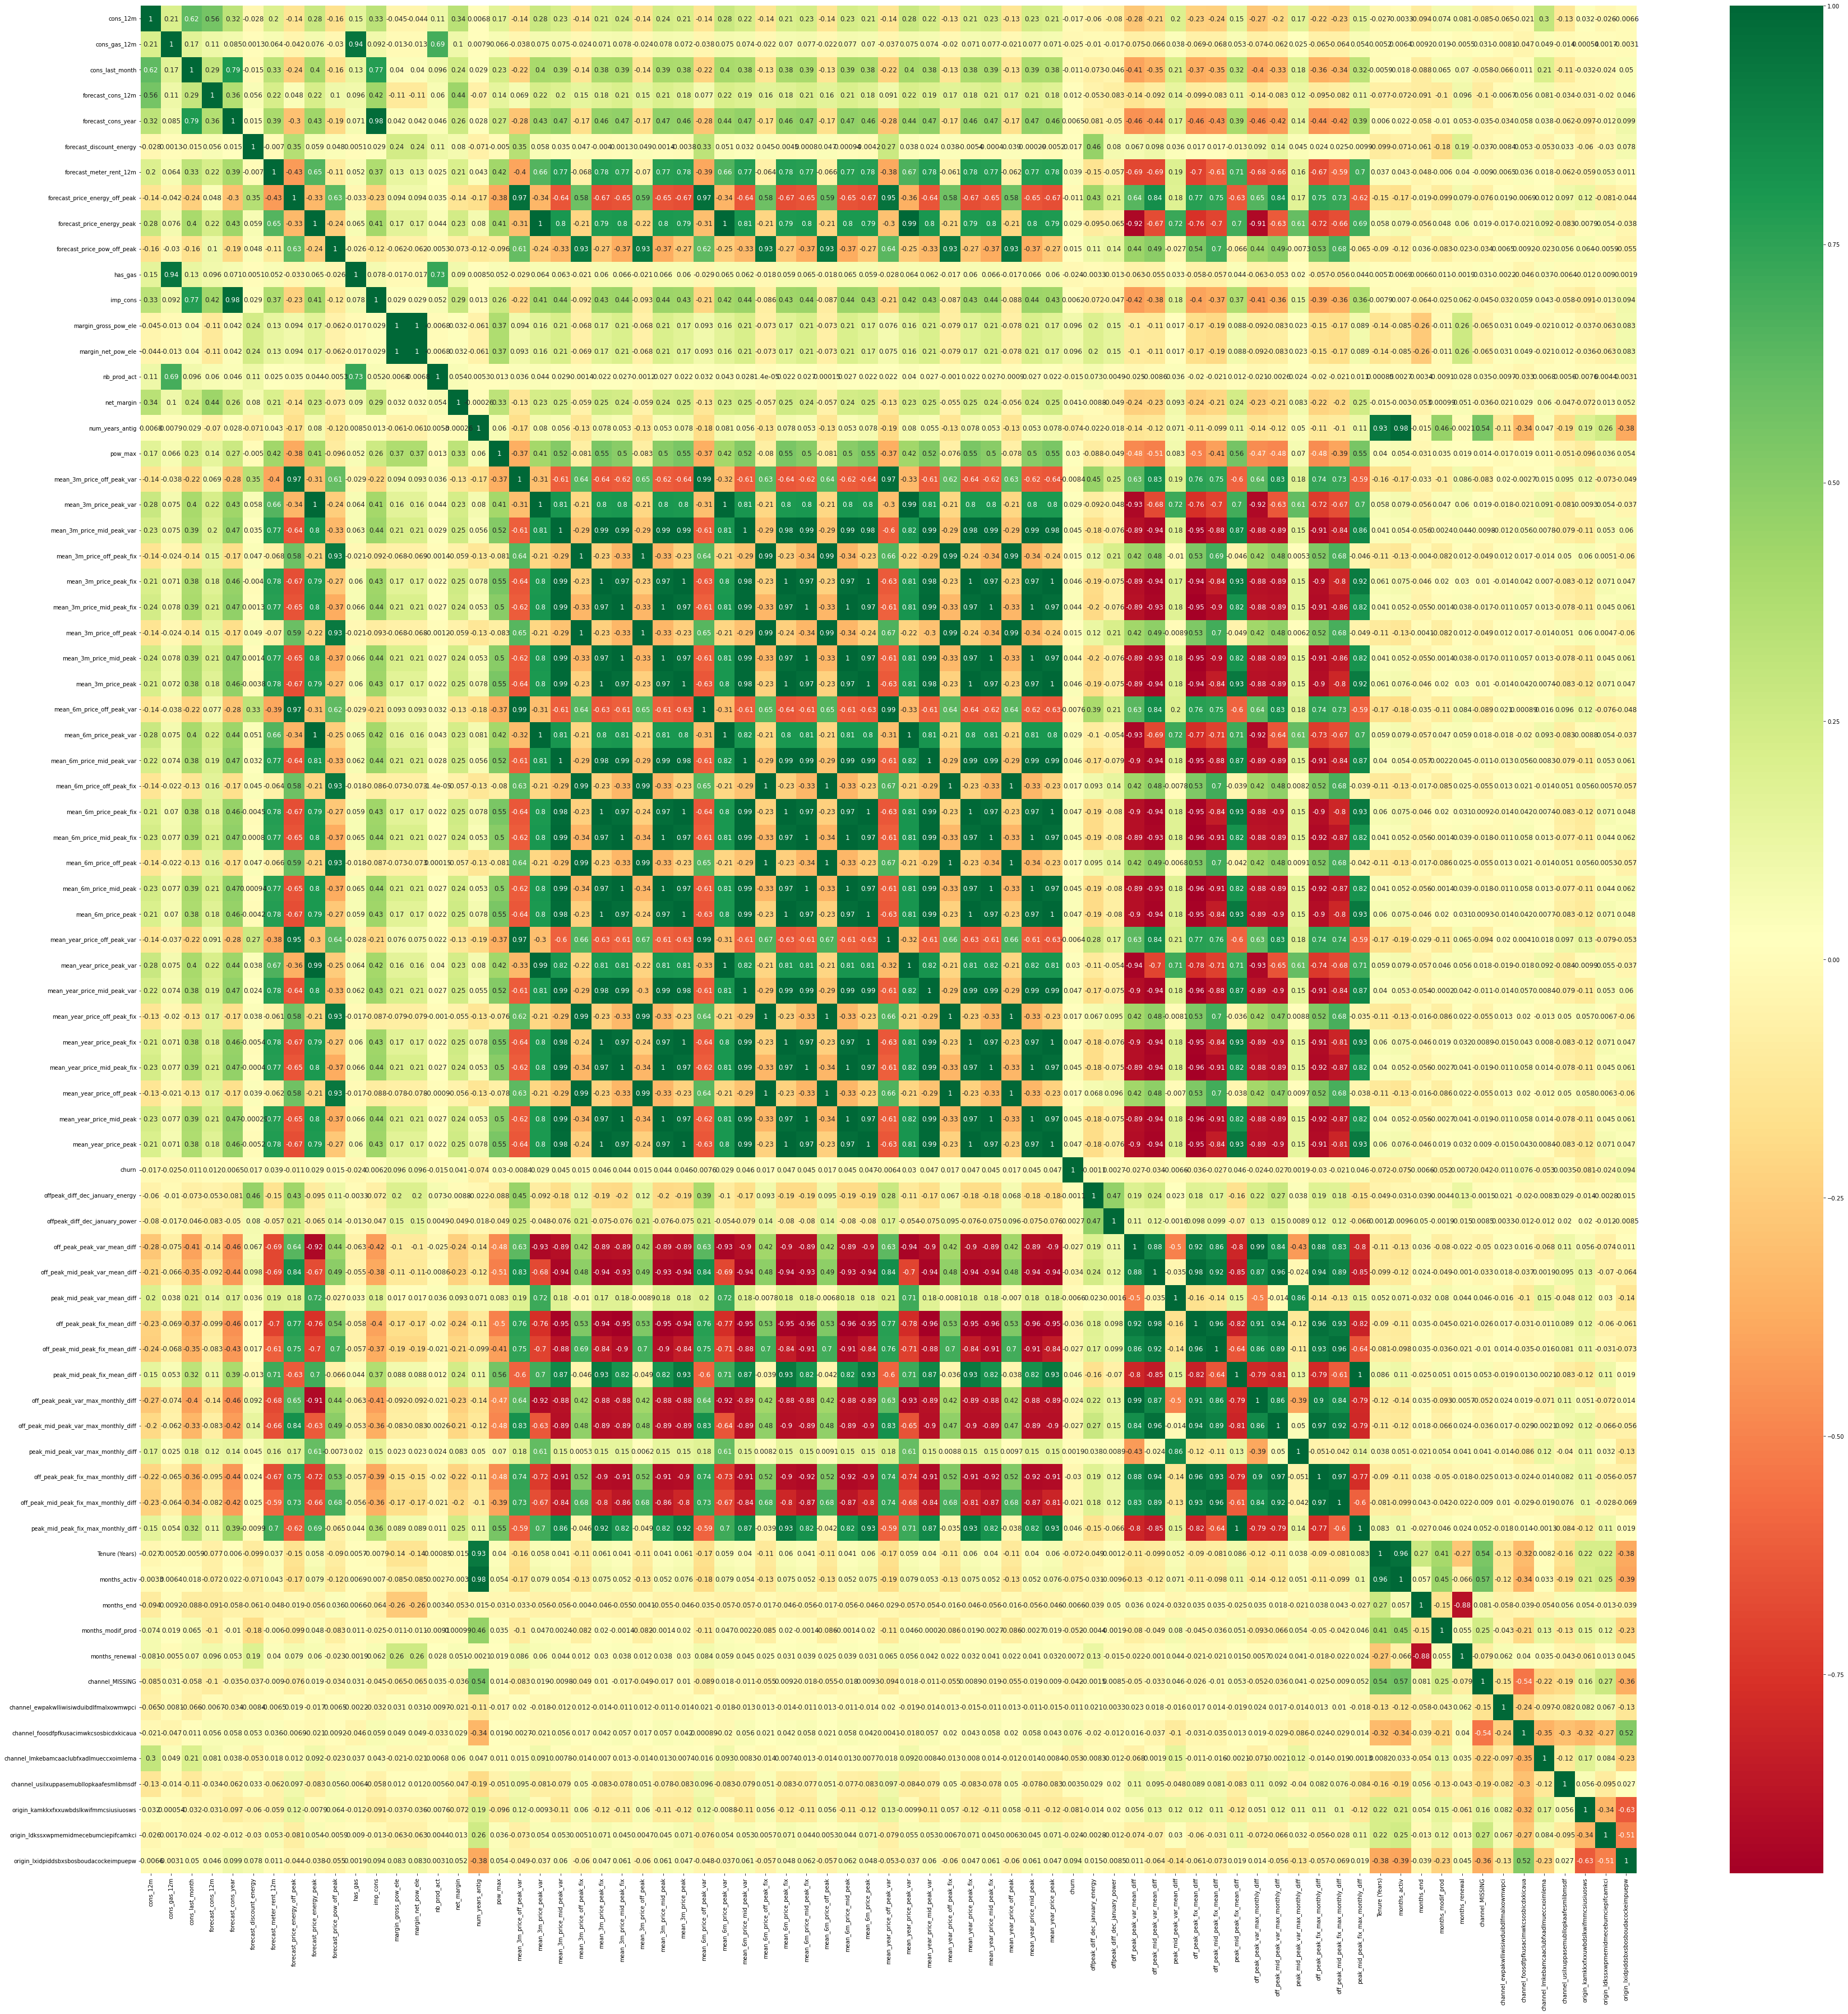

In [902]:
fig,ax = plt.subplots(figsize=(50,50))
sns.heatmap(data=corr,
            annot=True,
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values, 
            ax=ax,
            annot_kws={'size': 12}, 
            cmap='RdYlGn')
plt.tight_layout()
plt.show()

In [903]:
# removing features num_years_antig and forecast_cons_year as they high correlation with other variables

rem = ['num_years_antig','forecast_cons_year']
eda_data = eda_data.drop(columns=rem)
eda_data.head(3)


,id,cons_12m,cons_gas_12m,cons_last_month,forecast_cons_12m,forecast_discount_energy,forecast_meter_rent_12m,forecast_price_energy_off_peak,forecast_price_energy_peak,forecast_price_pow_off_peak,...,months_modif_prod,months_renewal,channel_MISSING,channel_ewpakwlliwisiwduibdlfmalxowmwpci,channel_foosdfpfkusacimwkcsosbicdxkicaua,channel_lmkebamcaaclubfxadlmueccxoimlema,channel_usilxuppasemubllopkaafesmlibmsdf,origin_kamkkxfxxuwbdslkwifmmcsiusiuosws,origin_ldkssxwpmemidmecebumciepifcamkci,origin_lxidpiddsbxsbosboudacockeimpuepw
0,24011ae4ebbe3035111d65fa7c15bc57,0.000000,4.739944,0.0,0.000000,0.0,0.444045,0.114481,0.098142,40.606701,...,2,6,0,0,1,0,0,0,0,1
1,d29c2c54acc38ff3c0614d0a653813dd,3.668479,0.000000,0.0,2.280920,0.0,1.237292,0.145711,0.000000,44.311378,...,76,4,1,0,0,0,0,1,0,0
2,764c75f661154dac3a6c254cd082ea7d,2.736397,0.000000,0.0,1.689841,0.0,1.599009,0.165794,0.087899,44.311378,...,68,8,0,0,1,0,0,1,0,0


### Building Model using Random Forest Classifier

In [904]:
#reordering churn 
columns = eda_data.columns.to_list()
columns.remove('churn')
columns.append('churn')
eda_data = eda_data[columns]

In [905]:
eda_data.head(3)

,id,cons_12m,cons_gas_12m,cons_last_month,forecast_cons_12m,forecast_discount_energy,forecast_meter_rent_12m,forecast_price_energy_off_peak,forecast_price_energy_peak,forecast_price_pow_off_peak,...,months_renewal,channel_MISSING,channel_ewpakwlliwisiwduibdlfmalxowmwpci,channel_foosdfpfkusacimwkcsosbicdxkicaua,channel_lmkebamcaaclubfxadlmueccxoimlema,channel_usilxuppasemubllopkaafesmlibmsdf,origin_kamkkxfxxuwbdslkwifmmcsiusiuosws,origin_ldkssxwpmemidmecebumciepifcamkci,origin_lxidpiddsbxsbosboudacockeimpuepw,churn
0,24011ae4ebbe3035111d65fa7c15bc57,0.000000,4.739944,0.0,0.000000,0.0,0.444045,0.114481,0.098142,40.606701,...,6,0,0,1,0,0,0,0,1,1
1,d29c2c54acc38ff3c0614d0a653813dd,3.668479,0.000000,0.0,2.280920,0.0,1.237292,0.145711,0.000000,44.311378,...,4,1,0,0,0,0,1,0,0,0
2,764c75f661154dac3a6c254cd082ea7d,2.736397,0.000000,0.0,1.689841,0.0,1.599009,0.165794,0.087899,44.311378,...,8,0,0,1,0,0,1,0,0,0


In [906]:
data = eda_data.copy(deep=True)

In [907]:
X = data.iloc[:,1:-1].values
y = data.iloc[:,-1].values

In [908]:
X.shape

(14605, 70)

In [909]:
y.shape

(14605,)

Splitting dataset (75:25)

In [910]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.25,random_state=45)

In [911]:
X_train.shape

(10953, 70)

In [912]:
X_test.shape

(3652, 70)

# Train the Model (Random Forest)

In [964]:
from sklearn.ensemble import RandomForestClassifier

In [982]:
classifier = RandomForestClassifier(criterion='log_loss',n_estimators= 1000)
classifier.fit(X_train,y_train)

RandomForestClassifier(criterion='log_loss', n_estimators=1000)

In [983]:
y_pred = classifier.predict(X_test)

In [984]:
y_test = y_test.reshape(len(y_test),1)
y_pred = y_pred.reshape(len(y_pred),1)

In [985]:
np.set_printoptions(precision=2)
print(np.concatenate((y_test.reshape(len(y_test),1),y_pred.reshape(len(y_pred),1)),1))

[[0 0]
 [0 0]
 [0 0]
 ...
 [0 0]
 [1 0]
 [0 0]]


### Model Evaluation

Now let's evaluate how well this trained model is able to predict the values of the test dataset.

We are going to use 3 metrics to evaluate performance:

Accuracy = the ratio of correctly predicted observations to the total observations
Precision = the ability of the classifier to not label a negative sample as positive
Recall = the ability of the classifier to find all the positive samples
ROC & AUC = It tells how much the model is capable of distinguishing between classes.
K-Fold Cross Validation = how the results of a statistical analysis will generalize to an independent data set.
The reason why we are using these five metrics is because a simple accuracy is not always a good measure to use. To give an example, let's say you're predicting heart failures with patients in a hospital and there were 100 patients out of 1000 that did have a heart failure.

If you predicted 80 out of 100 (80%) of the patients that did have a heart failure correctly, you might think that you've done well! However, this also means that you predicted 20 wrong and what may the implications of predicting these remaining 20 patients wrong? Maybe they miss out on getting vital treatment to save their lives.

As well as this, what about the impact of predicting negative cases as positive (people not having heart failure being predicted that they did), maybe a high number of false positives means that resources get used up on thee wrong people and a lot of time is wasted when they could have been helping the real heart failure sufferers.

This is just an example, but it illustrates why other performance metrics are necessary such Precision and Recall, which are good measures to use in a classification scenario.

In [986]:
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score,roc_auc_score,roc_curve,confusion_matrix

In [987]:
accuracy = accuracy_score(y_test,y_pred)
precision = precision_score(y_test,y_pred)
recall = recall_score(y_test,y_pred)
f1 = f1_score(y_test,y_pred)
auc= roc_auc_score(y_test,y_pred)
cm= confusion_matrix(y_test,y_pred)

In [988]:
print(f'Accuracy : {accuracy:.4f}')
print(f'Precision : {precision:.4f} ')
print(f'Recall : {recall:.4f}')
print(f'F1 Score : {f1:.4f}')
print(f'AUC : {auc:.4f}')

Accuracy : 0.9006
Precision : 0.7586 
Recall : 0.0582
F1 Score : 0.1081
AUC : 0.5280


In [989]:
print(f'Confusion Matrix')
print(cm)

Confusion Matrix
[[3267    7]
 [ 356   22]]


ROC Curve

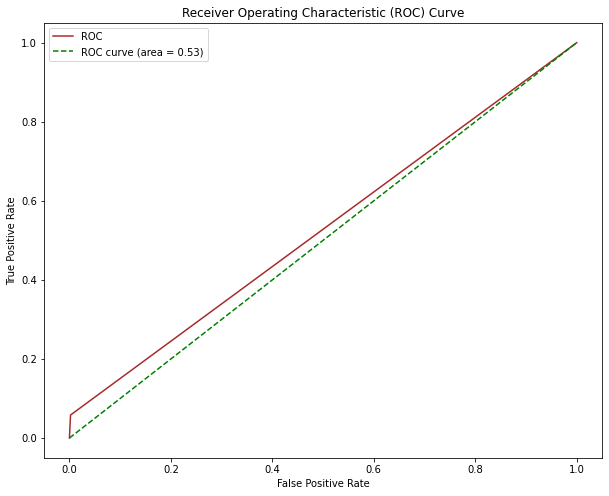

In [990]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred)

plt.figure(figsize=(10,8))
plt.plot(fpr, tpr, color='brown', label='ROC')
plt.plot([0, 1], [0, 1], color='green', linestyle='--',label='ROC curve (area = %0.2f)' % auc)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()

### Feature Importance

In [974]:
feature_importances = pd.DataFrame({'features':data.columns[1:-1].to_list(),
                                     'importance': classifier.feature_importances_}).sort_values(by='importance',ascending=True).reset_index()

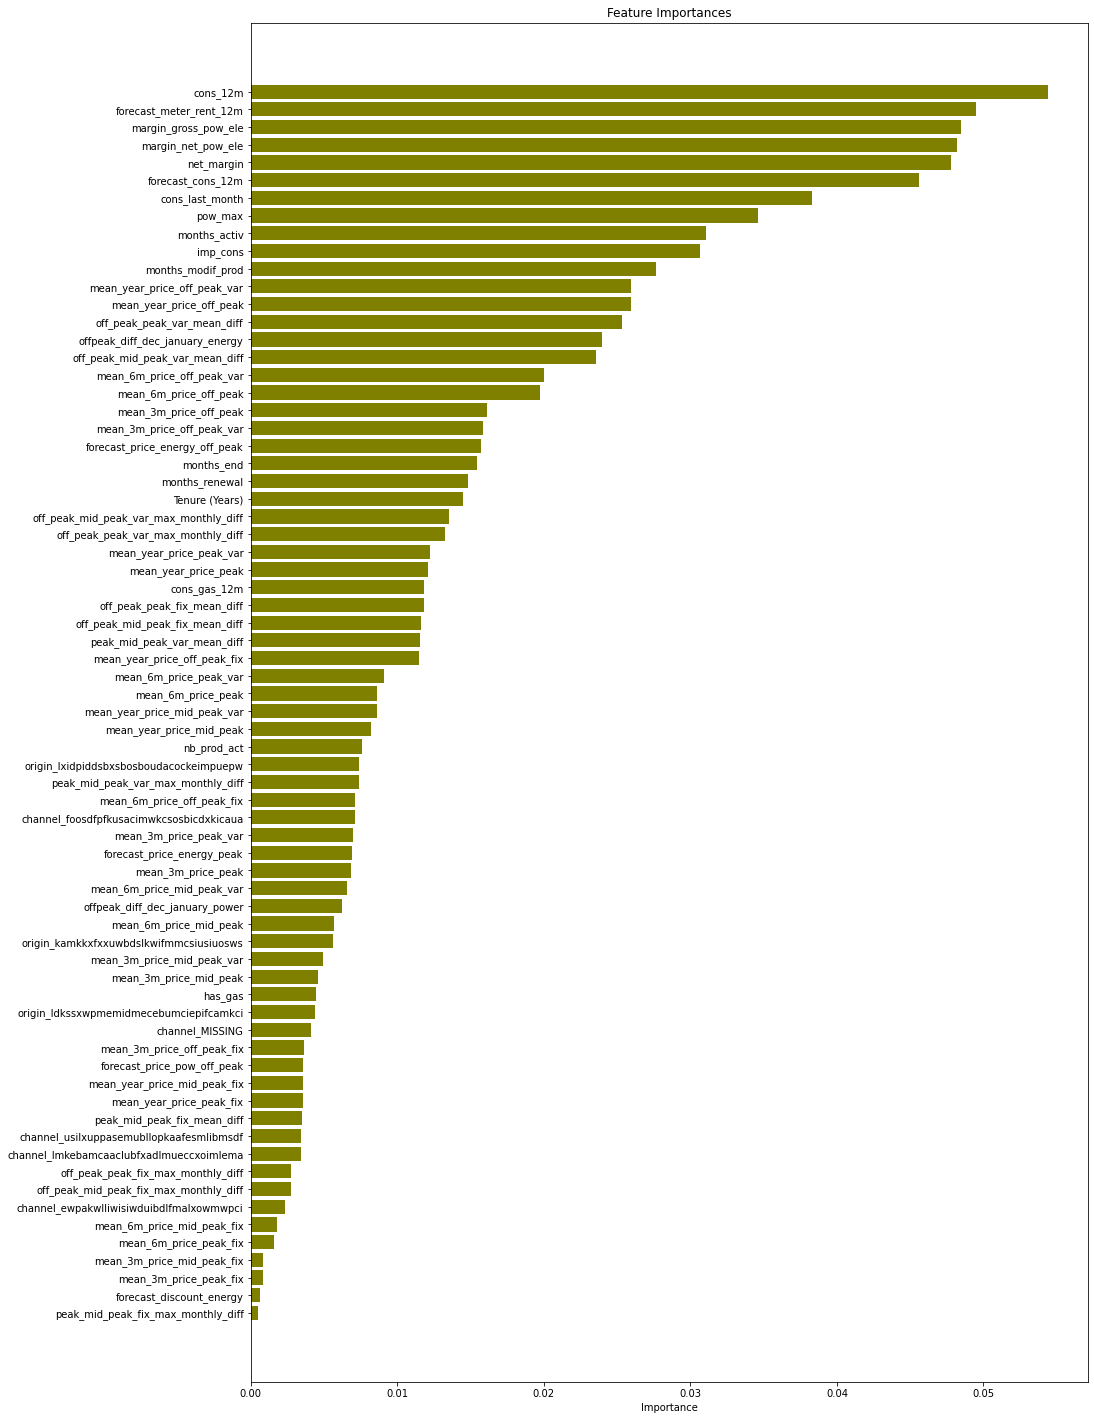

In [975]:
plt.figure(figsize=(15, 25))
plt.title('Feature Importances')
plt.barh(range(len(feature_importances)), feature_importances['importance'], color='olive', align='center')
plt.yticks(range(len(feature_importances)), feature_importances['features'])
plt.xlabel('Importance')
plt.show()

In [979]:
proba_predictions = classifier.predict_proba(X_test)
probabilities = proba_predictions[:, 1]
X_test_df = pd.DataFrame(data=X_test,columns=data.columns[1:-1].to_list())
X_test_df['churn'] = y_test
X_test_df['churn_pred'] = y_pred
X_test_df['churn_probability'] = probabilities.tolist()
X_test_df.to_csv('predicted_data.csv')

In [981]:
X_test_df.head(20)

,cons_12m,cons_gas_12m,cons_last_month,forecast_cons_12m,forecast_discount_energy,forecast_meter_rent_12m,forecast_price_energy_off_peak,forecast_price_energy_peak,forecast_price_pow_off_peak,has_gas,...,channel_ewpakwlliwisiwduibdlfmalxowmwpci,channel_foosdfpfkusacimwkcsosbicdxkicaua,channel_lmkebamcaaclubfxadlmueccxoimlema,channel_usilxuppasemubllopkaafesmlibmsdf,origin_kamkkxfxxuwbdslkwifmmcsiusiuosws,origin_ldkssxwpmemidmecebumciepifcamkci,origin_lxidpiddsbxsbosboudacockeimpuepw,churn,churn_pred,churn_probability
0,4.144512,3.413132,2.845718,3.257875,28.0,2.115976,0.154410,0.130525,41.105201,1.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0,0,0.118
1,4.984874,0.000000,4.112538,3.135021,0.0,2.114811,0.115174,0.098837,40.606701,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0,0,0.202
2,4.118331,0.000000,3.105169,3.191233,0.0,1.250176,0.160397,0.081752,44.311378,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0,0,0.033
3,3.468938,0.000000,0.000000,2.649948,0.0,1.284882,0.146694,0.000000,44.311378,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0,0,0.099
4,3.548635,4.204256,0.000000,2.540555,0.0,1.034227,0.167086,0.088444,46.305378,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0,0,0.135
5,5.185893,0.000000,4.403721,3.129522,0.0,2.121199,0.116910,0.100572,40.606701,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0,0,0.027
6,3.056905,0.000000,0.000000,2.239350,0.0,1.244772,0.146694,0.000000,44.311378,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0,0,0.012
7,3.538825,0.000000,0.000000,2.718742,0.0,1.232996,0.146694,0.000000,44.311378,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0,0,0.003
8,4.688998,4.170584,3.809223,3.705404,0.0,2.154333,0.115360,0.100243,40.606701,1.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0,0,0.043
9,3.807873,0.000000,0.000000,2.960171,0.0,1.572523,0.138305,0.000000,44.311378,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0,0,0.066


### Conclusion

From above two charts, we conclude that:
1. Net margin on power subscription and consumption over 12 months is a top driver for churn in this model
2. Forecasted bill of meter rental for the next 12 months also is an influential driver
3. Time seems to be an influential factor, especially the number of months they have been active, their tenure and the number of months since they updated their contract
4. The feature that our colleague recommended is in the top half in terms of how influential it is and some of the features built off the back of this actually outperform it
5. Our price sensitivity features are scattered around but are not the main driver for a customer churning
The last observation is important because this relates back to our original hypothesis:
Based on observations,it is a weak contributor. However, to arrive at a conclusive result, more experimentation is needed.